In [1]:
import numpy as np

import torch
import torchaudio

import matplotlib.pyplot as plt

In [2]:
# def get_sinusoid_encoding_table(n_seq, d_hidn):
#     def cal_angle(position, i_hidn):
#         return position / np.power(10000, 2 * (i_hidn // 2) / d_hidn)
#     def get_posi_angle_vec(position):
#         return [cal_angle(position, i_hidn) for i_hidn in range(d_hidn)]

#     sinusoid_table = np.array([get_posi_angle_vec(i_seq) for i_seq in range(n_seq)])
#     sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # even index sin 
#     sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # odd index cos

#     return sinusoid_table

In [3]:
# pos_emb = torch.zeros([1, 1, 1025, 431])

In [4]:
def get_poistional_encoding(freq_bin, max_freq, mel=None):
    freq = np.linspace(0, max_freq, freq_bin)
    if mel == True:
        freq = 2595 * np.log10(1+freq/700)
    freq = freq / np.max(freq)
    return freq

In [5]:
linear_freq = get_poistional_encoding(1025, 22050, None)
mel_freq = get_poistional_encoding(1025, 22050, True)

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 9.98046875e-01
 9.99023438e-01 1.00000000e+00]


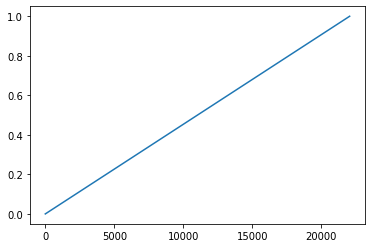

In [6]:
print(linear_freq)
plt.plot(np.linspace(0, 22050, 1025), linear_freq)

[0.         0.00870324 0.01715052 ... 0.9994557  0.99972798 1.        ]


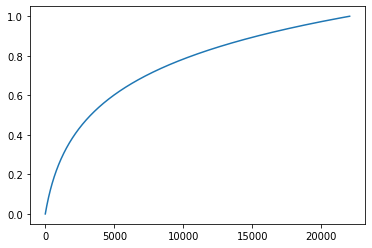

In [7]:
print(mel_freq)
plt.plot(np.linspace(0, 22050, 1025), mel_freq)

In [8]:
linear_freq.shape

(1025,)

In [89]:
t = torch.tensor(linear_freq)
t = t.reshape(1, -1, 1)
t = t.expand(1, 1025, 431)

In [90]:
t.shape

torch.Size([1, 1025, 431])

In [91]:
p = t.clone()

In [92]:
p.shape

torch.Size([1, 1025, 431])

In [98]:
t[0][1].shape

torch.Size([431])